In [1]:

%run ../../load_magic/storage.py
%pprint
# http://www.murderdata.org/p/offenders.html
file_path = r'C:\Users\dev\Downloads\Offender_Race_data.csv'
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 file_path	 load_csv	 
load_dataframes	 load_object	 os	 pd	 pickle	 save_dataframes	 store_objects	 sys	 


In [2]:

import inspect

def get_module_version(python_module):
    for attr in dir(python_module):
        if 'version' in attr.lower():
            if hasattr(getattr(python_module, attr), '__call__'):
                try:
                    print('{}(): {}'.format(attr, getattr(python_module, attr)()))
                except Exception as e:
                    try:
                        print('{}({}): {}'.format(attr, inspect.getfullargspec(python_module),
                                                  getattr(python_module, attr)))
                    except Exception as e:
                        print('{}(): {} ({})'.format(attr, getattr(python_module, attr), e))
            else:
                print('{}: {}'.format(attr, getattr(python_module, attr, '????')))
get_module_version(pd)

__git_version__: cb00deb94500205fcb27a33cc1d0df79a9727f8b
__version__: 0.24.2
_np_version_under1p13: False
_np_version_under1p14: False
_np_version_under1p15: False
_np_version_under1p16: False
_np_version_under1p17: False
_version: <module 'pandas._version' from 'C:\\Users\\dev\\Anaconda3\\lib\\site-packages\\pandas\\_version.py'>

INSTALLED VERSIONS
------------------
commit: None
python: 3.6.8.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: 4.4.1
pip: 19.1
setuptools: 41.0.1
Cython: 0.29.7
numpy: 1.17.1
scipy: 1.2.1
pyarrow: None
xarray: None
IPython: 7.5.0
sphinx: 2.0.1
patsy: 0.5.1
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: 1.2.1
tables: 3.5.1
numexpr: 2.6.9
feather: None
matplotlib: 3.1.1
openpyxl: 2.6.2
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.7
lxml.etree: 4.3.3
bs4: 4.7.1
html5lib: 1.0.1
sqlalchemy: 1.3.3
p

In [6]:

offender_df = load_csv(csv_name='Offender_Race_data', folder_path=None)
offender_df.columns

Index(['Agency', 'Cntyfips', 'Circumstance', 'MSA', 'Number of Records',
       'Off Race', 'State', 'Vic Age', 'Vic Race', 'Vic Sex', 'Weapon',
       'Year'],
      dtype='object')

In [7]:

columns_list = ['Off Race', 'State', 'Year']
offender_df[columns_list].sample(5)

,Off Race,State,Year
325187,White,Texas,2008
200671,White,California,2015
71494,Unknown,New York,1990
283913,Unknown,Massachusetts,1991
513760,Asian,California,1983


In [8]:

offender_df['Number of Records'].unique()

array([1], dtype=int64)

In [9]:

groupby_df = offender_df.groupby(columns_list).count()['Number of Records']
[fn for fn in dir(groupby_df) if 'index' in fn.lower()]

['_create_indexer', '_find_valid_index', '_get_index_resolvers', '_index', '_indexed_same', '_needs_reindex_multi', '_reindex_axes', '_reindex_indexer', '_reindex_multi', '_reindex_with_indexers', 'first_valid_index', 'index', 'last_valid_index', 'reindex', 'reindex_axis', 'reindex_like', 'reset_index', 'sort_index']

In [10]:

offender_df = groupby_df.reset_index()
offender_df.columns = ['Race', 'State', 'Year', 'Count']

In [11]:

offender_df['Year'].unique()

array([1979, 1980, 1994, 2002, 2004, 2005, 2010, 1976, 1977, 1978, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2003, 2006, 2007,
       2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [12]:

match_series = (offender_df['State'] == 'Rhodes Island')
offender_df.loc[match_series, 'State'] = 'Rhode Island'

In [13]:

offender_df['Race'].unique()

array(['American Indian or Alaskan Native', 'Asian', 'Black',
       'Native Hawaiian or Pacific Islander', 'Unknown', 'White'],
      dtype=object)

In [14]:

# https://en.wikipedia.org/wiki/Demography_of_the_United_States
wiki_url = 'https://en.wikipedia.org/wiki'
tables_url = '{}/Demography_of_the_United_States'.format(wiki_url)
tables_df_list = pd.read_html(tables_url)
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

[(6, (84, 9)), (25, (52, 9)), (40, (85, 5))]


In [15]:

def get_counts(population_int, percent_str):
    percent_float = float(str(percent_str).split('%')[0])/100
    count_int = int(population_int*percent_float)
    
    return count_int

population_2015_df = tables_df_list[25].copy()
population_2015_df.columns = ['State', 'Population', 'White', 'Black', 'American Indian or Alaskan Native', 'Asian',
                              'Native Hawaiian or Pacific Islander', 'Some other race', 'Two or more races']
for column_name in ['White', 'Black', 'American Indian or Alaskan Native', 'Asian', 'Native Hawaiian or Pacific Islander',
                    'Some other race', 'Two or more races']:
    population_2015_df[column_name] = population_2015_df.apply(lambda row_series: get_counts(row_series['Population'], row_series[column_name]),
                                                               axis='columns')

In [16]:

population_2015_df

,State,Population,White,Black,American Indian or Alaskan Native,Asian,Native Hawaiian or Pacific Islander,Some other race,Two or more races
0,Alabama,4830620,3323466,1275283,24153,57967,4830,62798,82120
1,Alaska,733375,484027,24934,101205,43269,8800,9533,61603
2,Arizona,6641928,5207271,278960,292244,199257,13283,431725,212541
3,Arkansas,2958208,2307402,458522,17749,41414,5916,62122,62122
4,California,38421464,23744464,2266866,268950,5263740,153685,4956368,1728965
5,Colorado,5278906,4444838,211156,47510,153088,5278,226992,184761
6,Connecticut,3593222,2777560,370101,7186,150915,0,183254,100610
7,Delaware,926454,642959,200114,2779,33352,0,21308,25014
8,District of Columbia,647484,260288,316619,1942,23956,0,27194,17482
9,Florida,19645772,14930786,3162969,58937,510790,19645,491144,471498


In [17]:

offender_df['Population'] = pd.np.nan
year = 2015
year_match_series = (offender_df['Year'] == year)
for row_index, row_series in offender_df[year_match_series].iterrows():
    race = row_series['Race']
    state = row_series['State']
    if state == 'Rhode Island':
        print(race)
    match_series = (population_2015_df['State'] == state)
    if race in population_2015_df.columns:
        population_list = population_2015_df[match_series][race].tolist()
        if len(population_list) == 1:
            offender_df.loc[row_index, 'Population'] = population_list[0]

Black
Unknown
White


In [18]:

match_series = offender_df['Population'].isnull()
offender_df[~match_series].head()

,Race,State,Year,Count,Population
46,American Indian or Alaskan Native,Alaska,2015,17,101205.0
88,American Indian or Alaskan Native,Arizona,2015,31,292244.0
135,American Indian or Alaskan Native,California,2015,7,268950.0
172,American Indian or Alaskan Native,Delaware,2015,1,2779.0
193,American Indian or Alaskan Native,Florida,2015,2,58937.0


In [19]:

def get_rate(population, count):
    
    # First, take your population and divide it by 100,000
    groups = population / 100000
    
    # Now, how many murders would there be for each of those groups?
    rate = count / groups
    
    return rate

offender_df['Rate'] = offender_df.apply(lambda row_series: get_rate(row_series['Population'], row_series['Count']),
                                        axis='columns')
offender_df[~match_series].head()

,Race,State,Year,Count,Population,Rate
46,American Indian or Alaskan Native,Alaska,2015,17,101205.0,16.797589
88,American Indian or Alaskan Native,Arizona,2015,31,292244.0,10.607574
135,American Indian or Alaskan Native,California,2015,7,268950.0,2.602714
172,American Indian or Alaskan Native,Delaware,2015,1,2779.0,35.984167
193,American Indian or Alaskan Native,Florida,2015,2,58937.0,3.393454


In [20]:

match_series = (offender_df['Race'] == 'Black') & (offender_df['Year'] == year)
offender_df[match_series]

,Race,State,Year,Count,Population,Rate
2233,Black,Alabama,2015,154,1275283.0,12.075751
2274,Black,Alaska,2015,10,24934.0,40.105880
2316,Black,Arizona,2015,33,278960.0,11.829653
2358,Black,Arkansas,2015,93,458522.0,20.282560
2400,Black,California,2015,283,2266866.0,12.484196
2442,Black,Colorado,2015,49,211156.0,23.205592
2484,Black,Connecticut,2015,31,370101.0,8.376092
2526,Black,Delaware,2015,36,200114.0,17.989746
2562,Black,District of Columbia,2015,72,316619.0,22.740265
2600,Black,Florida,2015,394,3162969.0,12.456651



We are looking to compute the intentional homicide rate per 100,000 inhabitants for our max year.

In [21]:

tables_df_list = pd.read_html('../data/html/intentional_homicide_victims_per_100K_inhabitants.html')
print([(i, df.shape) for (i, df) in enumerate(tables_df_list) if df.shape[0] > 50])

[(0, (231, 7))]


In [22]:

# UNODC intentional homicide victims: intentional homicide victims per 100,000 inhabitants
country_pop_df = tables_df_list[0]
country_pop_df = country_pop_df.set_index('Country (or dependent territory, subnational area, etc.)')
country_pop_df.index.name = 'Country'
country_pop_df.columns = ['Region', 'Subregion', 'Rate', 'Count', 'Year', 'Source']
country_pop_df['Rate'] = country_pop_df['Rate'].map(lambda x: float(x))
country_pop_df.head(5).T.head(5).T

,Region,Subregion,Rate,Count,Year
Country,,,,,
NaN,NaN,NaN,NaN,NaN,NaN
Burundi,Africa,Eastern Africa,6.02,635,2016
Comoros,Africa,Eastern Africa,7.7,60,2015
Djibouti,Africa,Eastern Africa,6.48,60,2015
Eritrea,Africa,Eastern Africa,8.04,390,2015


In [23]:

match_series = (country_pop_df['Subregion'].isin(['Eastern Africa', 'Middle Africa',
                                                  'Southern Africa', 'Western Africa']))
african_homicide_rates_list = country_pop_df[match_series]['Rate'].dropna().tolist()

In [24]:

match_series = (country_pop_df['Region'] == 'Europe')
european_homicide_rates_list = country_pop_df[match_series]['Rate'].dropna().tolist()

In [25]:

match_series = (offender_df['Race'] == 'Black') & (offender_df['Year'] == year)
black_homicide_rates_list = offender_df[match_series]['Rate'].dropna().tolist()

In [26]:

match_series = (offender_df['Race'] == 'White') & (offender_df['Year'] == year)
white_homicide_rates_list = offender_df[match_series]['Rate'].dropna().tolist()

In [27]:

mean_black_homicide_rate = pd.Series(black_homicide_rates_list).mean()
mean_white_homicide_rate = pd.Series(white_homicide_rates_list).mean()
mean_european_homicide_rate = pd.Series(european_homicide_rates_list).mean()
mean_african_homicide_rate = pd.Series(african_homicide_rates_list).mean()
print_str = '''
Mean African Homicide Rate: {}
Mean Black Homicide Rate: {}
Mean European Homicide Rate: {}
Mean White Homicide Rate: {}'''
print(print_str.format(mean_african_homicide_rate, mean_black_homicide_rate,
                       mean_european_homicide_rate, mean_white_homicide_rate))


Mean African Homicide Rate: 8.23843137254902
Mean Black Homicide Rate: 17.739236612862523
Mean European Homicide Rate: 1.5127450980392159
Mean White Homicide Rate: 2.265527179594902


In [28]:

from scipy.stats import ttest_ind

format_str = 'Here are the country groups tested against the murder rate data you agreed to:'
print(format_str)
print()

hypothesis_format_str = 'We {} reject the null hypothesis that the {} '
hypothesis_format_str += 'population did not come from the same distribution as the {} population.'

def test_populations(global_data, us_data, country_str, test_race):
    t, p = ttest_ind(a=global_data, b=us_data, axis=0, equal_var=True, nan_policy='raise')
    print('{} vs {}: t={:0.2f}; p={:0.3f}'.format(country_str, test_race, t[0], p[0]))

    # If that probability is small we can reject the null hypothesis
    if p[0] < 0.05:
        can_cannot = 'can'
    else:
        can_cannot = 'cannot'
    print(hypothesis_format_str.format(can_cannot, test_race, country_str))
    print()

global_european_data = pd.np.array(european_homicide_rates_list).reshape((-1, 1))
us_white_data = pd.np.array(white_homicide_rates_list).reshape((-1, 1))
country_str = 'European countries'
test_race = 'US White'
test_populations(global_european_data, us_white_data, country_str, test_race)

global_african_data = pd.np.array(african_homicide_rates_list).reshape((-1, 1))
country_str = 'African countries'
test_populations(global_african_data, us_white_data, country_str, test_race)

us_black_data = pd.np.array(black_homicide_rates_list).reshape((-1, 1))
country_str = 'European countries'
test_race = 'US Black'
test_populations(global_european_data, us_black_data, country_str, test_race)

country_str = 'African countries'
test_populations(global_african_data, us_black_data, country_str, test_race)

Here are the country groups tested against the murder rate data you agreed to:

European countries vs US White: t=-2.61; p=0.011
We can reject the null hypothesis that the US White population did not come from the same distribution as the European countries population.

African countries vs US White: t=5.50; p=0.000
We can reject the null hypothesis that the US White population did not come from the same distribution as the African countries population.

European countries vs US Black: t=-10.59; p=0.000
We can reject the null hypothesis that the US Black population did not come from the same distribution as the European countries population.

African countries vs US Black: t=-5.09; p=0.000
We can reject the null hypothesis that the US Black population did not come from the same distribution as the African countries population.



In [29]:

import matplotlib.pyplot as plt
%matplotlib inline

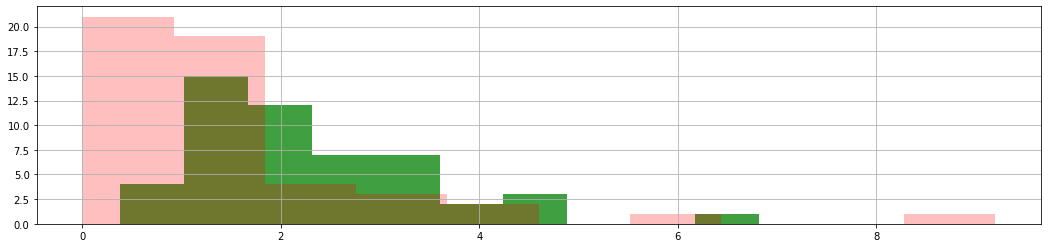

In [30]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
whites_AxesSubplot = pd.Series(white_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.75, color='green')
europeans_AxesSubplot = pd.Series(european_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.25,
                                                                     color='red')

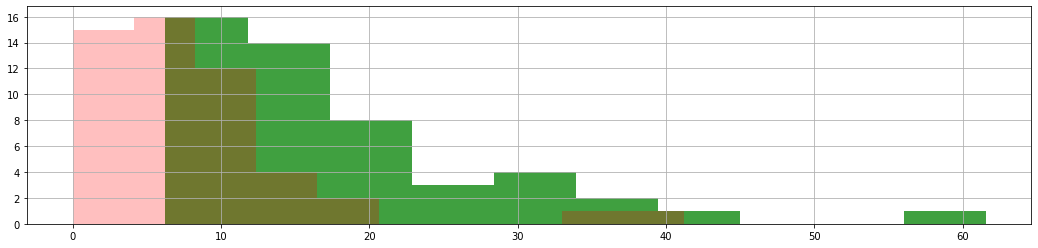

In [31]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
blacks_AxesSubplot = pd.Series(black_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.75, color='green')
africans_AxesSubplot = pd.Series(african_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.25,
                                                                   color='red')

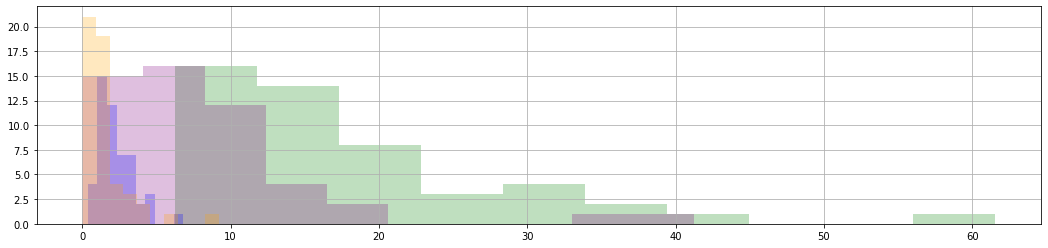

In [32]:

fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111, autoscale_on=True)
blacks_AxesSubplot = pd.Series(black_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.25, color='green')
africans_AxesSubplot = pd.Series(african_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.25,
                                                                   color='purple')
whites_AxesSubplot = pd.Series(white_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.25, color='blue')
europeans_AxesSubplot = pd.Series(european_homicide_rates_list).hist(ax=ax, bins=10, alpha=0.25,
                                                                     color='orange')

In [33]:

white_homicide_rates_list

[3.069085105729982, 6.8178014862807235, 3.7255598950006634, 2.6436659065043715, 3.364994888913896, 2.6547649205662838, 1.2600987917452728, 1.5553091254652318, 0.3841898205065159, 2.772794412832653, 1.7928200544851294, 1.679735945509366, 1.6190257108028816, 0.5264442056703628, 1.3198816301225194, 1.7722357995175975, 2.231396643330315, 2.985399320523115, 2.9607616456050936, 1.4255788444099489, 1.7271718380826169, 0.711924320196581, 1.7260224477529809, 1.175073556340534, 1.5263352182631096, 3.164088001698194, 3.0935432228754265, 1.5787140766647842, 4.712442609181081, 0.5641630721419499, 1.5291741768850031, 4.785087308178632, 1.0307761429615694, 1.768357967095681, 1.4060434873627936, 1.3943338674785255, 4.406297594232583, 1.9986355583516568, 1.630207554190017, 1.404298792654113, 4.0491744200569935, 2.6509987986789656, 2.946585717958352, 3.3907819329278177, 1.572722697533971, 1.6816699655425824, 1.9659214537146612, 2.5760438957879845, 2.8275826649562674, 1.7113183170855402, 2.27485132898710

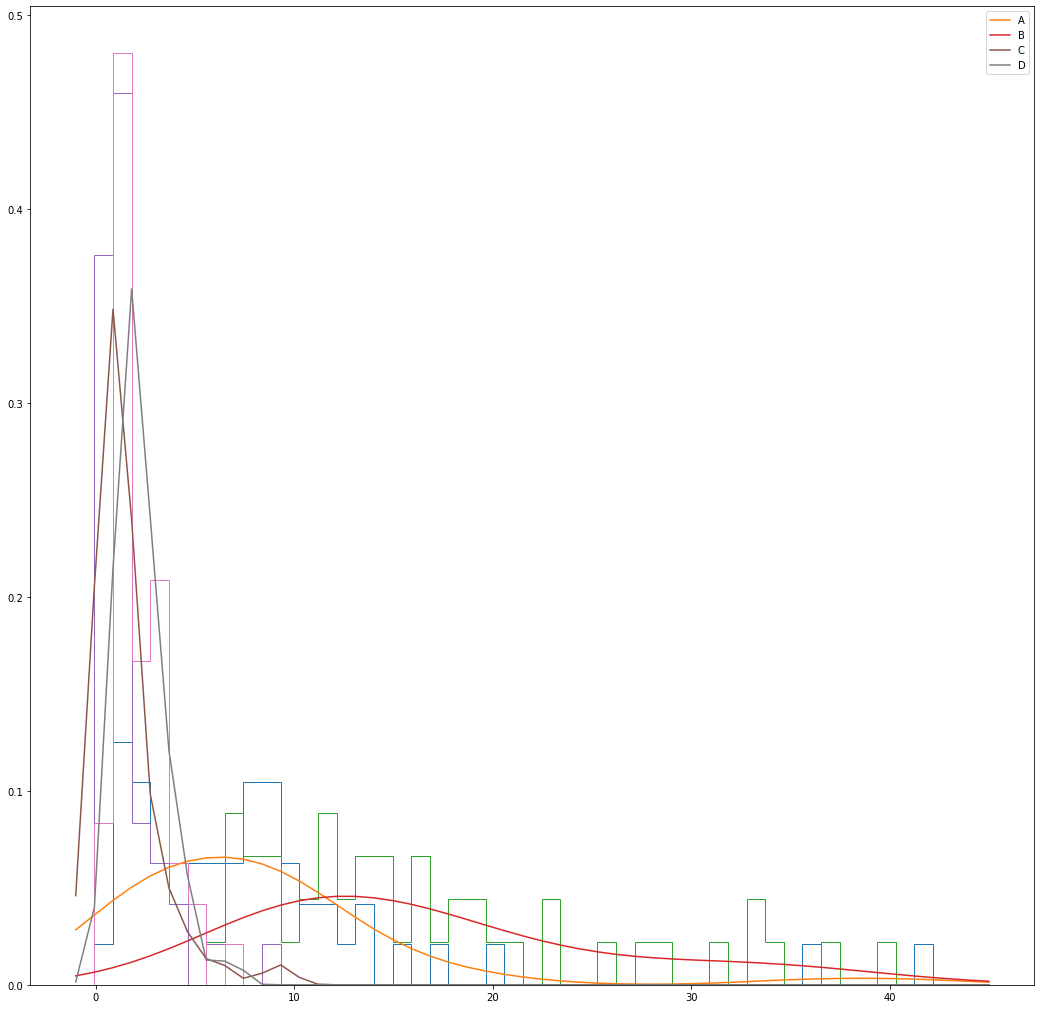

In [39]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, autoscale_on=True)
begin = -1
end = 45

A_list = [6.02, 7.7, 6.48, 8.04, 7.56, 5.0, 7.69, 1.73, 1.82, 5.93, 3.4, 1.82, 2.52, 12.74, 4.31, 13.9, 11.0, 6.95, 5.3, 6.67, 4.85, 1.4,
          19.76, 9.04, 9.32, 13.55, 2.31, 8.04, 3.36, 15.04, 9.5, 41.25, 17.14, 35.9, 1.1, 1.3, 11.49, 11.63, 9.13, 2.1, 8.82, 1.1, 3.23,
          10.9, 9.94, 4.44, 9.85, 0.0, 7.38, 1.71, 9.0]
A_array = pd.np.array(A_list)
density = stats.gaussian_kde(A_array)
n, x, _ = ax.hist(A_array, bins=np.linspace(begin, end, 50),
                  histtype=u'step', density=True)  
ax.plot(x, density(x), label='A')

B_list = [12.08, 40.11, 11.83, 20.28, 12.48, 23.21, 8.38, 17.99, 22.74, 12.46, 9.64, 7.11, 7.12, 19.53, 19.19, 28.61, 15.26, 16.43,
          61.56, 9.32, 7.35, 17.6, 14.43, 8.77, 25.46, 15.93, 17.87, 11.62, 7.49, 36.56, 8.31, 10.87, 34.64, 14.44, 32.83, 8.46,
          14.01, 13.14, 16.06, 7.41, 20.61, 13.9, 6.26, 14.51, 11.61, 11.13, 27.83, 33.45, 31.37]
B_array = pd.np.array(B_list)
density = stats.gaussian_kde(B_array)
n, x, _ = ax.hist(B_array, bins=np.linspace(begin, end, 50),
                  histtype=u'step', density=True)  
ax.plot(x, density(x), label='B')

C_list = [3.58, 1.5, 0.6, 2.5, 0.8, 3.19, 1.5, 9.2, 1.5, 6.2, 0.0, 1.2, 2.2, 1.2, 0.9, 0.9, 0.0, 4.2, 4.5, 0.5, 1.1, 1.2, 1.3, 1.1,
          1.2, 2.3, 0.0, 1.2, 1.1, 3.01, 0.7, 0.0, 0.67, 1.6, 0.94, 2.4, 0.7, 0.0, 1.1, 0.9, 0.7, 1.5, 0.66, 1.7, 1.3, 1.0, 0.0, 0.3,
          0.0, 0.8, 0.5]
C_array = pd.np.array(C_list)
density = stats.gaussian_kde(C_array)
n, x, _ = ax.hist(C_array, bins=np.linspace(begin, end, 50),
                  histtype=u'step', density=True)  
ax.plot(x, density(x), label='C')

D_list = [3.07, 6.82, 3.73, 2.64, 3.36, 2.65, 1.26, 1.56, 0.38, 2.77, 1.79, 1.68, 1.62, 0.53, 1.32, 1.77, 2.23, 2.99, 2.96, 1.43,
          1.73, 0.71, 1.73, 1.18, 1.53, 3.16, 3.09, 1.58, 4.71, 0.56, 1.53, 4.79, 1.03, 1.77, 1.41, 1.39, 4.41, 2.0, 1.63, 1.4,
          4.05, 2.65, 2.95, 3.39, 1.57, 1.68, 1.97, 2.58, 2.83, 1.71, 2.27]
D_array = pd.np.array(D_list)
density = stats.gaussian_kde(D_array)
n, x, _ = ax.hist(D_array, bins=np.linspace(begin, end, 50),
                  histtype=u'step', density=True)  
ax.plot(x, density(x), label='D')

plt.legend(loc='best')
plt.show()

In [44]:

from scipy import stats

stats.norm.cdf?

Signature: stats.norm.cdf(x, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `x`
File:      c:\users\dev\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method


In [48]:

cdf = stats.norm.cdf(data_dict['A'])
loc = data_dict['A']
rvs = rvs(loc, scale=1, size=1, random_state=None)
stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')

TypeError: 'numpy.ndarray' object is not callable

In [42]:

import itertools

format_str = 'Here are the samples tested against each other for similar histogram shapes ("distributions"):'
print(format_str)
print()

hypothesis_format_str = 'We {} reject the null hypothesis that the {} '
hypothesis_format_str += 'sample did not come from the same distribution as the {} sample.'

def test_populations(x1_data, x2_data, x1_name, x2_name):
    tstat, pvalue, dof = ttest_ind(x1=x1_data, x2=x2_data, usevar='unequal')
    print('{} vs {}: t={:0.2f}; p={:0.3f}'.format(x1_name, x2_name, tstat[0], pvalue[0]))

    # If that probability is small we can reject the null hypothesis
    if pvalue[0] < 0.05:
        can_cannot = 'can'
    else:
        can_cannot = 'cannot'
    print(hypothesis_format_str.format(can_cannot, x2_name, x1_name))
    print()

data_dict = {}
data_dict['A'] = pd.np.array(A_list).reshape((-1, 1))
data_dict['B'] = pd.np.array(B_list).reshape((-1, 1))
data_dict['C'] = pd.np.array(C_list).reshape((-1, 1))
data_dict['D'] = pd.np.array(D_list).reshape((-1, 1))

for x, y in list(itertools.combinations('ABCD', 2)):
    test_populations(data_dict[x], data_dict[y], x, y)

Here are the samples tested against each other for similar histogram shapes ("distributions"):

A vs B: t=-5.05; p=0.000
We can reject the null hypothesis that the B sample did not come from the same distribution as the A sample.

A vs C: t=6.13; p=0.000
We can reject the null hypothesis that the C sample did not come from the same distribution as the A sample.

A vs D: t=5.50; p=0.000
We can reject the null hypothesis that the D sample did not come from the same distribution as the A sample.

B vs C: t=10.38; p=0.000
We can reject the null hypothesis that the C sample did not come from the same distribution as the B sample.

B vs D: t=9.95; p=0.000
We can reject the null hypothesis that the D sample did not come from the same distribution as the B sample.

C vs D: t=-2.61; p=0.011
We can reject the null hypothesis that the D sample did not come from the same distribution as the C sample.



In [42]:

from statsmodels.stats.weightstats import ttest_ind
import itertools

format_str = 'Here are the samples tested against each other for similar histogram shapes ("distributions"):'
print(format_str)
print()

hypothesis_format_str = 'We {} reject the null hypothesis that the {} '
hypothesis_format_str += 'sample did not come from the same distribution as the {} sample.'

def test_populations(x1_data, x2_data, x1_name, x2_name):
    tstat, pvalue, dof = ttest_ind(x1=x1_data, x2=x2_data, usevar='unequal')
    print('{} vs {}: t={:0.2f}; p={:0.3f}'.format(x1_name, x2_name, tstat[0], pvalue[0]))

    # If that probability is small we can reject the null hypothesis
    if pvalue[0] < 0.05:
        can_cannot = 'can'
    else:
        can_cannot = 'cannot'
    print(hypothesis_format_str.format(can_cannot, x2_name, x1_name))
    print()

data_dict = {}
data_dict['A'] = pd.np.array(A_list).reshape((-1, 1))
data_dict['B'] = pd.np.array(B_list).reshape((-1, 1))
data_dict['C'] = pd.np.array(C_list).reshape((-1, 1))
data_dict['D'] = pd.np.array(D_list).reshape((-1, 1))

for x, y in list(itertools.combinations('ABCD', 2)):
    test_populations(data_dict[x], data_dict[y], x, y)

Here are the samples tested against each other for similar histogram shapes ("distributions"):

A vs B: t=-5.05; p=0.000
We can reject the null hypothesis that the B sample did not come from the same distribution as the A sample.

A vs C: t=6.13; p=0.000
We can reject the null hypothesis that the C sample did not come from the same distribution as the A sample.

A vs D: t=5.50; p=0.000
We can reject the null hypothesis that the D sample did not come from the same distribution as the A sample.

B vs C: t=10.38; p=0.000
We can reject the null hypothesis that the C sample did not come from the same distribution as the B sample.

B vs D: t=9.95; p=0.000
We can reject the null hypothesis that the D sample did not come from the same distribution as the B sample.

C vs D: t=-2.61; p=0.011
We can reject the null hypothesis that the D sample did not come from the same distribution as the C sample.



In [38]:

ndigits = 2
[round(number, ndigits) for number in D_list]

[3.07, 6.82, 3.73, 2.64, 3.36, 2.65, 1.26, 1.56, 0.38, 2.77, 1.79, 1.68, 1.62, 0.53, 1.32, 1.77, 2.23, 2.99, 2.96, 1.43, 1.73, 0.71, 1.73, 1.18, 1.53, 3.16, 3.09, 1.58, 4.71, 0.56, 1.53, 4.79, 1.03, 1.77, 1.41, 1.39, 4.41, 2.0, 1.63, 1.4, 4.05, 2.65, 2.95, 3.39, 1.57, 1.68, 1.97, 2.58, 2.83, 1.71, 2.27]